In [ ]:
from seaborn.categorical import _BoxPlotter


class box_plotter(_BoxPlotter):
    def add_statistic_annotate(self, ax, x1, x2, y, h, value, text_type,
                               **kws):
        default_lw = mpl.rcParams["patch.linewidth"]
        lw = kws.get("linewidth", kws.get("lw", default_lw))
        width = x2 - x1
#         x1, x2 = x1 + .1 * width, x2 - .1 * width
#         x1, x2 = x1 + .5, x2 - .5
        ax.plot([x1, x1, x2, x2], [y - .5 * h, y, y, y - .5 * h],
                lw=1.5,
                c='k')
        print(text_type)
        if text_type == 'raw':
            ax.text((x1 + x2) * .5,
                    y + h * .1,
                    f'P = {value:.2e}',
                    ha='center',
                    va='bottom',
                    color='k')
        elif value >= 0.05:
            ax.text((x1 + x2) * .5,
                    y + h * .1,
                    'n.s.',
                    ha='center',
                    va='bottom',
                    color='k')
        elif value >= 0.01:
            ax.text((x1 + x2) * .5,
                    y + h * .1,
                    '*',
                    ha='center',
                    va='bottom',
                    color='k')
        elif value >= 0.001:
            ax.text((x1 + x2) * .5,
                    y + h * .1,
                    '**',
                    ha='center',
                    va='bottom',
                    color='k')
        else:
            ax.text((x1 + x2) * .5,
                    y + h * .1,
                    '***',
                    ha='center',
                    va='bottom',
                    color='k')

    def draw_statistic_annotate(self, ax, centerCol, text_type, **kwargs):
        from operator import methodcaller
        from scipy import stats
        if kwargs.get('statistic_test') == 'mannwhitneyu':
            statistic_kwargs = {
                'use_continuity': kwargs.get('use_continuity', True),
                'alternative': kwargs.get('alternative', None)
            }
        elif kwargs.get('statistic_test') == 'wilcoxon':
            statistic_kwargs = {
                'zero_method': kwargs.get('zero_method', 'wilcox'),
                'correction': kwargs.get('correction', False),
                'alternative': kwargs.get('alternative', 'two-sided')
            }
        elif kwargs.get('statistic_test') == 'ttest_ind':
            statistic_kwargs = {
                'axis': kwargs.get('axis', 0),
                'equal_var': kwargs.get('equal_var', True),
                'nan_policy': kwargs.get('nan_policy', 'propagate')
            }
        elif kwargs.get('statistic_test') == 'ttest_rel':
            statistic_kwargs = {
                'axis': kwargs.get('axis', 0),
                'nan_policy': kwargs.get('nan_policy', 'propagate')
            }
        else:
            raise ValueError(
                'statistic_test must be either mannwhitneyu, wilcoxon, ttest_ind or ttest_rel.'
            )
        ylim = ax.get_ylim()
        h = .05 * (ylim[1] - ylim[0])
#         print(self.plot_hues)
        if self.plot_hues is None:
            if centerCol == None :
                for i in range(len(self.plot_data) - 1):
                    pvalue = methodcaller(kwargs.get('statistic_test'),
                                          self.plot_data[i], self.plot_data[i + 1],
                                          **statistic_kwargs)(stats).pvalue
                    y = max(
                        mpl.cbook.boxplot_stats(self.plot_data[i])[0]['whishi'],
                        mpl.cbook.boxplot_stats(
                            self.plot_data[i + 1])[0]['whishi']) + .15 * h
                    self.add_statistic_annotate(ax,
                                                i,
                                                i + 1,
                                                y,
                                                h,
                                                pvalue,
                                                text_type
#                                                 text_type=kwargs.get(
#                                                     'text_type', 'raw')
                                               )
            else :
                for i in range(len(self.plot_data)):
                    if i != centerCol :
                        pvalue = methodcaller(kwargs.get('statistic_test'),
                                              self.plot_data[i], self.plot_data[centerCol],
                                              **statistic_kwargs)(stats).pvalue
                        y = max(
                            mpl.cbook.boxplot_stats(self.plot_data[i])[0]['whishi'],
                            mpl.cbook.boxplot_stats(
                                self.plot_data[centerCol])[0]['whishi']) + 1.7 * h * i
                        self.add_statistic_annotate(ax,
                                                    i,
                                                    centerCol,
                                                    y,
                                                    h,
                                                    pvalue,
                                                    text_type
#                                                     text_type=kwargs.get(
#                                                         'text_type', 'raw')
                                                   )
                    
        else:
            for i in range(len(self.plot_data)):
                offsets = self.hue_offsets
                for j in range(len(self.hue_names) - 1):
                    pvalue = methodcaller(
                        kwargs.get('statistic_test'), self.plot_data[i][
                            self.plot_hues[i] == self.hue_names[j]],
                        self.plot_data[i][self.plot_hues[i] == self.hue_names[
                            j + 1]], **statistic_kwargs)(stats).pvalue
                    y = max(
                        mpl.cbook.boxplot_stats(
                            self.plot_data[i][self.plot_hues[i] ==
                                              self.hue_names[j]])[0]['whishi'],
                        mpl.cbook.boxplot_stats(self.plot_data[i][
                            self.plot_hues[i] == self.hue_names[j + 1]])[0]
                        ['whishi']) + .15 * h
                    self.add_statistic_annotate(ax,
                                                i + offsets[j],
                                                i + offsets[j + 1],
                                                y,
                                                h,
                                                pvalue,
                                                text_type
#                                                 text_type=kwargs.get(
#                                                     'text_type', 'raw')
                                               )
    
        ax.set_ylim(ylim[0], ylim[1] + 1.5 * h)


def boxplot(x=None,
            y=None,
            hue=None,
            data=None,
            order=None,
            hue_order=None,
            orient=None,
            color=None,
            palette=None,
            saturation=0.75,
            width=0.8,
            dodge=True,
            fliersize=5,
            linewidth=None,
            whis=1.5,
            ax=None,
            statistic_args=None,
            centerCol=None,
            text_type='clean',
            **kwargs):
    plotter = box_plotter(x, y, hue, data, order, hue_order, orient, color,
                          palette, saturation, width, dodge, fliersize,
                          linewidth)
    if ax is None:
        ax = plt.gca()
    kwargs.update(dict(whis=whis))
    plotter.draw_boxplot(ax, kwargs)
    plotter.annotate_axes(ax)
    if statistic_args:
        kwargs = statistic_args
        plotter.draw_statistic_annotate(ax, centerCol, text_type, **kwargs)
    if plotter.orient == "h":
        ax.invert_yaxis()

In [ ]:
def gen_bursting_parameters_mp():
    for index, row in bursting_mp.iterrows():
        yield index, row[1][0], row[2][0]

bursting_parameters_mp = pd.DataFrame(gen_bursting_parameters_mp(),columns=['transcript_id','frequency','size'])
bursting_parameters_mp['transcript_id_clean'] = bursting_parameters_mp['transcript_id'].str.split('.', expand = True)[0]
bursting_parameters_mp

,transcript_id,frequency,size,transcript_id_clean
0,ENSDART00000000004.5,0.012916,5624.809668,ENSDART00000000004
1,ENSDART00000000042.11,0.178075,10786.343662,ENSDART00000000042
2,ENSDART00000000070.7,0.102093,2515.847841,ENSDART00000000070
3,ENSDART00000000160.10,0.013870,4272.301796,ENSDART00000000160
4,ENSDART00000000192.10,0.064587,515.443617,ENSDART00000000192
...,...,...,...,...
7297,ENSDART00000194760.1,0.087435,1197.935026,ENSDART00000194760
7298,ENSDART00000194854.1,0.020643,388.955991,ENSDART00000194854
7299,ENSDART00000194893.1,0.001944,18.848049,ENSDART00000194893
7300,ENSDART00000194896.1,0.003008,19.097703,ENSDART00000194896


clean
clean
clean
clean


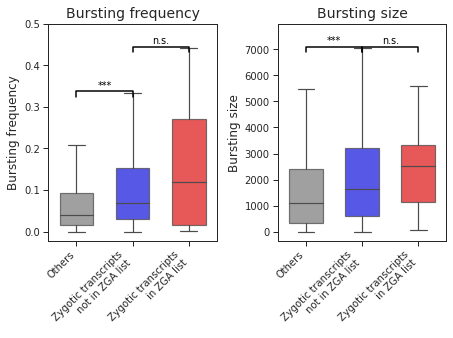

In [ ]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):    
    fig, axes = plt.subplots(1,2, tight_layout = True, figsize = (6.4,4.8))
    ax = axes[0]
    boxplot(
        x = 'Class',
        y = 'frequency',
        data = bursting_parameters_mp,
        showfliers = False,
        width = .6,
        ax = ax,
        palette = ['grey', 'blue', 'red'],
        boxprops=dict(alpha=.75),
        statistic_args={'statistic_test': 'mannwhitneyu',
                                'use_continuity': False,},
        text_type = 'clean'
        
    )
    ax.set_title('Bursting frequency')
    ax.set_xlabel('')
    ax.set_ylabel('Bursting frequency')
    ax.set_xticks(range(3))
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, va = 'top', ha = 'right')
    
    ax = axes[1]
    boxplot(
        x = 'Class',
        y = 'size',
        data = bursting_parameters_mp,
        showfliers = False,
        width = .6,
        ax = ax,
        palette = ['grey', 'blue', 'red'],
        boxprops=dict(alpha=.75),
        statistic_args={'statistic_test': 'mannwhitneyu',
                                 'use_continuity': False,},
        text_type = 'clean'
        
    )
    ax.set_title('Bursting size')
    ax.set_ylabel('Bursting size')
    ax.set_xlabel('')    
    ax.set_xticks(range(3))
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, va = 'top', ha = 'right')
    
    
    fig.savefig('/mnt/Storage/home/wangyiman/early_embryo_network/figures/make14_box_smart2_1k_burstingSizeFreq_MandP_zygotic.pdf', transparent = True)